In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
!pip install seaborn
import seaborn as sns

In [10]:
def gauss1d(x, sig, mu):
    return (1/(sig*np.sqrt(2*np.pi)))*np.exp((-(x-mu)**2)/(2*sig**2))

In [11]:
def plot_img3d(img2D_array):
    # 3D plot
    # create the x and y coordinate arrays (here we just use pixel indices)
    xx, yy = np.mgrid[0:img2D_array.shape[0], 0:img2D_array.shape[1]]
    # create the figure
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.plot_surface(xx, yy, img2D_array, rstride=1, cstride=1, cmap=plt.cm.gray, linewidth=0)
    # show it
    plt.show()

In [12]:
def m(x, y):
    return (np.sign(x)+np.sign(y)) * np.minimum(np.absolute(x), np.absolute(y)) / 2

def forward_x_derivative(u):
    h, w = u.shape
    u_shifted_left = np.zeros((h, w))
    
    u_shifted_left[:, 0:w-1] = u[:, 1:w]
    u_shifted_left[:, w-1] = u[:, w-1]
    
    return u_shifted_left - u
    
def forward_y_derivative(u):
    h, w = u.shape
    u_shifted_down = np.zeros((h, w))
    
    u_shifted_down[1:h, :] = u[0:h-1, :]
    u_shifted_down[0,:] = u[0, :]
    
    return u_shifted_down - u

def backward_x_derivative(u):
    h, w = u.shape
    u_shifted_right = np.zeros((h, w))
    
    u_shifted_right[:, 1:w] = u[:, 0:w-1]
    u_shifted_right[:, 0] = u[:, 0]
    
    return u - u_shifted_right

def backward_y_derivative(u):
    h, w = u.shape
    u_shifted_up = np.zeros((h, w))
     
    u_shifted_up[0:h-1] = u[1:h]
    u_shifted_up[h-1] = u[h-1]
    
    return u - u_shifted_up

In [13]:
def L(u):
    ux = m(forward_x_derivative(u), backward_x_derivative(u))
    uy = m(forward_y_derivative(u), backward_y_derivative(u))
    
    uxx = m(forward_x_derivative(ux), backward_x_derivative(ux))
    uyy = m(forward_y_derivative(uy), backward_y_derivative(uy))
    
    uxy = m(forward_y_derivative(ux), backward_y_derivative(ux))
    
    return uxx * (ux**2) + 2 * uxy * ux * uy + uyy * (uy**2)

In [18]:
def shock_filter(u0, num_iters):
    del_t = 0.1
    u = u0
    for n in range(num_iters):
        #print("Iter:", n, "********")
        ux_f = forward_x_derivative(u)
        ux_b = backward_x_derivative(u)

        uy_f = forward_y_derivative(u)
        uy_b = backward_y_derivative(u)
        
        Lu_sign = np.sign(L(u))
        grad_abs = np.sqrt(m(ux_f, ux_b)**2 + m(uy_f, uy_b)**2)
        
        u = u + del_t * (-grad_abs * Lu_sign)

    print("Shock filtered u")
    ax = sns.heatmap(u, cmap="gray")
    plt.show()

u0 image 2D


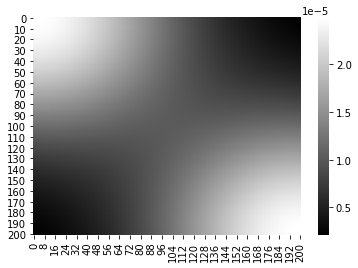

Shock filtered u


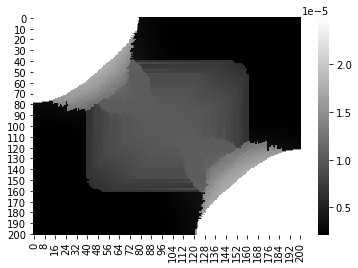

In [19]:
u0 = np.zeros((201, 201))

sigma = 80
for x in range(201):
    for y in range(201):
        u0[y, x] += gauss1d(x, sigma, 0) * gauss1d(y, sigma, 0)
        u0[y, x] += gauss1d(x-201, sigma, 0) * gauss1d(y-201, sigma, 0)

print("u0 image 2D")
ax = sns.heatmap(u0, cmap="gray")
plt.show()

shock_filter(u0, 1000)